## Exporting: Example 01 - Polygon Flood Contours
Created by Brandon Tucker in 2023 <br> 
<br>
In this example, we will create contours as polygons based on the maximum flooding outputs from ADCIRC, <br> then export those polygons as a .shp file. This is the first step in Kalpana's downscaling process. <br> <br>
You can think of a contour as a shape that covers an area with a certain max flooding level. <br>
One of the main assumptions we make with Kalpana is that these areas have a constant flooding level.
<br> <br> For this example, we will study Hurricane Florence in 2018. <br>
**The following cell imports necessary packages and functions.**

In [1]:
import sys

#import Kalpana functions from github repository
# sys.path.append(r'C:/Users/brand/Github/Kalpana')
from kalpana.export import *
from kalpana.visualizations import *

First, let's take a look at the maxele.63.nc file, which is the primary input to Kalpana. <br>
This file contains maximum water level data as an output of ADCIRC. <br>
**The following cell creates a visualization of the maxele.63.nc file for Hurricane Florence.**
<br> <br> Note: understanding the functions to create these visualizations is not relevant to the operation of Kalpana.

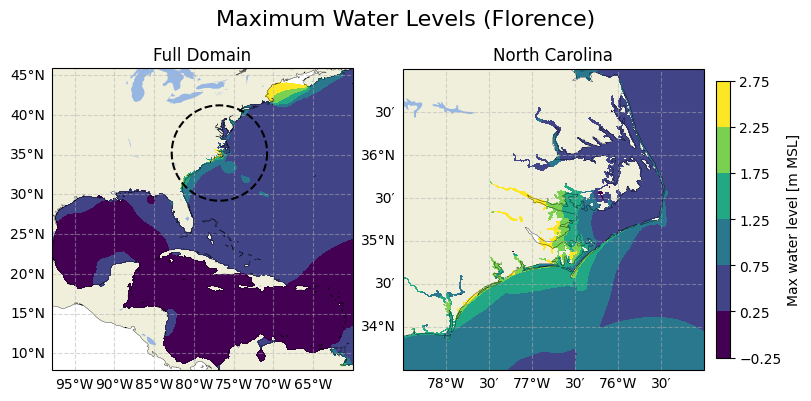

In [2]:
#plot the maximum water levels from a given maxele.63.nc file
#understanding these functions to create visualizations is not relevant to the operation of Kalpana

## path to netcdf file
nc = r'/home/tomas/Insync/tacuevas@ncsu.edu/Google Drive/NCSU/Kalpana/Examples_github/inputs/maxele.63.nc' 
## flooding levels to plot: min, max, step. creates 0.5 meter bins around each level
levels = [0, 3, 0.5]

# create two subplots
fig, ax = plt.subplots(figsize = (8,4), nrows = 1, ncols = 2,  subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)

# visualize the netcdf file for the full domain
vis_netcdf(nc, 'zeta_max', levels, ax = ax[0], cbar = False, point_circle = Point(-76.8, 35.2))
ax[0].set_title('Full Domain')

# visualize the netcdf file for the NC bounds
vis_netcdf(nc, 'zeta_max', levels, xlims = [-78.5, -75], ylims = [33.5, 37], ax = ax[1], fig = fig, cbar = True, cbar_label = 'Max water level [m MSL]', ticks = np.arange(levels[0]-0.25, levels[1]+0.25, levels[2]))
ax[1].set_title('North Carolina')
fig.suptitle('Maximum Water Levels (Florence)', fontsize = 16);

Next, we will use the nc2shp() function to create contours based on these maximum water levels. <br>
**The following cell defines our parameters for the nc2shp() function.**

In [3]:
######## for more detail about the nc2shp inputs please read the function's docstring

## path of the adcirc maxele output file, must be a netcdf file
ncFile = r'/home/tomas/Insync/tacuevas@ncsu.edu/Google Drive/NCSU/Kalpana/Examples_github/inputs/maxele.63.nc'

## name of the maxele variable to downscale. Always 'zeta_max' for downscaling
var = 'zeta_max'

## Contour levels. Min, Max and Step. Max IS included as in np.arange method. Values must be in vUnitOut vertical unit.
## from 0 to 3 meters (included) every 0.5
levels = [0, 3, 0.5]

## 'polyline' or 'polygon'
## we are creating polygons in this example
conType = 'polygon'

## complete path of the output file (*.shp or *.gpkg)
pathOut = r'/home/tomas/Insync/tacuevas@ncsu.edu/Google Drive/NCSU/Kalpana/Debug/github_examples/example01.shp'

## coordinate system of the output shapefile
epsgOut = 4326  # output in latitude and longitude, based on downscaling DEM

## input and output vertical units. For the momment only supported 'm' and 'ft'  
vUnitIn = 'm' ## Default 'm'
vUnitOut = 'm' ## Default 'ft'

## coordinate system of the adcirc input.
## Default is 4326 since ADCIRC uses latitude and longitude
epsgIn = 4326  

## complete path of the subdomain polygon kml or shapelfile, or list with the
## upper-left x, upper-left y, lower-right x and lower-right y coordinates. 
## the crs must be the same of the adcirc input file. 
subDomain = None  ## Default None

## True for export the mesh geodataframe and also save it as a shapefile. 
## for this example we are only exporting the contours, not the mesh.
exportMesh = False  ## Default False

## file name of the output mesh shapefile. Default None
meshName = None  ## Default None

## full path of the pickle file with the vertical difference between datums for each mesh node. 
dzFile = None  ## Default None

## threshold for using nearest neighbor interpolation to change datum. Points below this value won't be changed.
zeroDif = -20  ## Default -20

## threshold to define the percentage of the dz given by the spatial interpolation to be applied.
maxDif = -5

## distance threshold for limiting the inverse distance-weighted (IDW) interpolation
distThreshold = 0.5

## number of points return in the kdtree query
k = 7

## timesteps to extract if working with a time-varying ADCIRC output file
timesteps = None

Now, let's call the nc2shp() function with the parameters we defined. <br>
**The following cell runs nc2shp().**
<br> <br>
Note that the output .shp file will also be saved to the path specified in the pathOut parameter.

In [4]:
## call nc2shp() and store output as geodataframe
gdf = nc2shp(ncFile, var, levels, conType, pathOut, epsgOut, vUnitOut=vUnitOut, vUnitIn=vUnitIn, epsgIn=epsgIn,
           subDomain=subDomain, exportMesh=exportMesh, meshName=meshName, dzFile=dzFile, zeroDif=zeroDif,
           maxDif=maxDif, distThreshold=distThreshold, k=k, timesteps=timesteps)

2024-04-21 11:30:27.215 | INFO     | kalpana.export:nc2shp:817 - Start exporting adcirc to shape
2024-04-21 11:30:27.978 | INFO     | kalpana.export:filledContours2gpd:311 - Begin computing contours using Dask
2024-04-21 11:30:29.371 | INFO     | kalpana.export:filledContours2gpd:313 - Finnished computing contours using Dask
2024-04-21 11:30:29.376 | INFO     | kalpana.export:nc2shp:847 -     Ready with the contours extraction: 0.036 min
2024-04-21 11:30:29.817 | INFO     | kalpana.export:nc2shp:884 -     Saving file: 0.007 min
2024-04-21 11:30:29.818 | INFO     | kalpana.export:nc2shp:901 - Ready with exporting code after: 0.043 min


**The following cell visualizes the output polygon contours of nc2shp().**

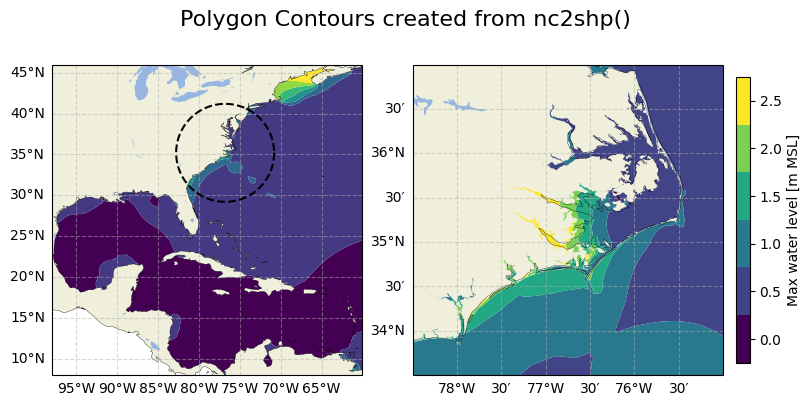

In [5]:
# create two subplots
fig, ax = plt.subplots(figsize = (8,4), nrows = 1, ncols = 2, subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)

# visualize polygons for the full domain
vis_pgons(gdf, levels, xlims = [-98, -60], ylims = [8, 46], ax = ax[0], fig = fig, fsize = (8,6), cbar = False, 
          point_circle = Point((-76.8, 35.2)))

# visualize polygons for the NC bounds
vis_pgons(gdf, levels, xlims = [-78.5, -75], ylims = [33.5, 37], ax = ax[1], fig = fig, fsize = (8,6), cbar = True, 
          cbar_label = 'Max water level [m MSL]')
fig.suptitle(f'Polygon Contours created from nc2shp()', fontsize = 16);

Finally, we can look at the original maximum flooding levels and the contours we generated side-by-side. <br>
**The following cell creates a comparison plot.** <br>
<br>
When we ran nc2shp() we used a 0.5 meter level step, so we will compare these outputs with <br>
the maximum water levels plotted in 0.5 meter bins. As you can see, they align closely.

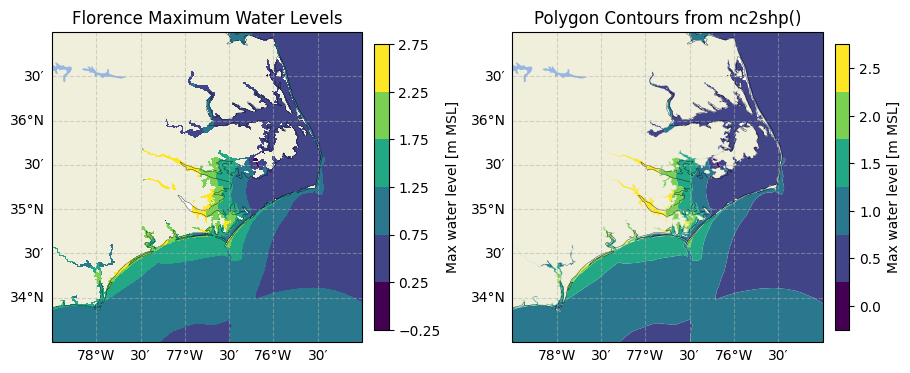

In [6]:
# create two subplots
fig, ax = plt.subplots(figsize = (9,4.5), nrows = 1, ncols = 2,  subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)

# visualize the netcdf file for the NC bounds
vis_netcdf(nc, 'zeta_max', levels, xlims = [-78.5, -75], ylims = [33.5, 37], ax = ax[0], fig = fig, cbar = True, 
           cbar_label = 'Max water level [m MSL]', ticks = np.arange(levels[0]-0.25, levels[1]+0.25, levels[2]))
ax[0].set_xlabel('Longitude [deg]')
ax[0].set_ylabel('Latitude [deg]')
ax[0].set_title('Florence Maximum Water Levels')

# visualize polygons for the NC bounds
vis_pgons(gdf, levels, xlims = [-78.5, -75], ylims = [33.5, 37], ax = ax[1], fig = fig, fsize = (8,6), cbar = True, 
          cbar_label = 'Max water level [m MSL]')
ax[1].set_xlabel('Longitude [deg]')
ax[1].set_ylabel('Latitude [deg]')
ax[1].set_title('Polygon Contours from nc2shp()');

Good luck with Kalpana! See you in future examples! <br>